In [1]:
from quasinet.qnet import qdistance, save_qnet
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 
#import cognet.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## read in data, configure to Qnet specifications and fit Qnet model
data_obj=dataFormatter(samples="data/PTSD_cognet_test_processed.csv")
features,samples = data_obj.Qnet_formatter()

In [3]:
fit = False
model_obj = model()
if fit:
    model_obj.fit(data_obj=data_obj, njobs=2)
    # model_obj.save("examples_results/PTSD_cognet_test.joblib")
    save_qnet(model_obj.myQnet, "results/PTSD_cognet_test.joblib", low_mem=False)
else:
    model_obj.load("results/PTSD_cognet_test.joblib")

In [4]:
# load Qnet, write mpi files for distance matrix
# run qdistance matrix with "./mpi_run.sh" command
cognet_obj = cg()
cognet_obj.load_from_model(model_obj, data_obj, 'all')
cognet_obj.samples

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,4,2,5,4,2,3,2,3,3,2,...,2,4,4,3,2,3,2,2,4,2
1,3,2,3,3,1,3,2,2,2,1,...,3,4,4,3,3,3,4,3,4,5
2,2,2,2,4,1,3,3,2,2,4,...,4,2,2,4,4,2,3,2,2,5
3,2,2,5,1,3,2,1,2,2,1,...,1,2,3,3,3,2,1,1,2,2
4,4,1,1,1,2,2,1,1,1,2,...,2,2,2,2,1,1,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,4,2,3,4,1,1,1,1,3,2,...,2,2,2,2,2,2,2,2,2,3
300,5,2,2,4,4,3,2,5,4,4,...,5,5,5,5,4,5,5,4,4,5
301,5,1,2,1,1,3,5,5,3,4,...,4,3,3,2,3,1,3,2,5,5
302,2,1,3,3,1,2,2,2,1,1,...,1,1,1,1,1,2,2,2,2,2


In [7]:
cognet_obj.dmat_filewriter("results/PTSD_cognet_test.joblib",
                           #mpi_path="mpi_tmp",
                           pyfile="PTSD_cognet.py",
                           MPI_LAUNCHER_FILE="./mpi_launcher.sh",
                           NODES=4,T=2)

In [16]:
# random mask and reconstruction
cognet_obj.set_nsamples(10)
recon_df = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv')
print("reconstruction results", recon_df)

reconstruction results       rederr    r_prob  rand_err  \
0  51.088739  0.217647  0.375780   
1  50.710468  0.216981  0.389375   
2  45.700483  0.217925  0.383367   
3  50.974385  0.218095  0.466421   
4  46.678111  0.216667  0.460036   
5  47.614586  0.216346  0.371420   
6  31.207350  0.217619  0.462839   
7  19.155394  0.219545  0.478454   
8  39.676240  0.217544  0.393235   
9  36.610167  0.218500  0.367961   

                                               mask_  
0  [ptsd3, ptsd4, ptsd6, ptsd7, ptsd8, ptsd11, pt...  
1  [ptsd1, ptsd5, ptsd6, ptsd7, ptsd9, ptsd12, pt...  
2  [ptsd6, ptsd8, ptsd9, ptsd16, ptsd18, ptsd19, ...  
3  [ptsd1, ptsd2, ptsd10, ptsd13, ptsd14, ptsd18,...  
4  [ptsd2, ptsd5, ptsd9, ptsd11, ptsd12, ptsd13, ...  
5  [ptsd1, ptsd3, ptsd7, ptsd8, ptsd14, ptsd15, p...  
6  [ptsd3, ptsd6, ptsd7, ptsd10, ptsd12, ptsd13, ...  
7  [ptsd1, ptsd6, ptsd8, ptsd10, ptsd11, ptsd12, ...  
8  [ptsd1, ptsd2, ptsd3, ptsd6, ptsd9, ptsd11, pt...  
9  [ptsd3, ptsd5, ptsd6, ptsd8

In [17]:
cognet_dist = qdistance(np.array(cognet_obj.samples.iloc[3]), np.array(cognet_obj.samples.iloc[4]), model_obj.myQnet, model_obj.myQnet)
qdistance(samples[3],samples[4], model_obj.myQnet, model_obj.myQnet)
#samples.shape
#len(model_obj.myQnet.feature_names)

0.09268731566380253

In [18]:
print(samples[3])
print(np.array(data_obj.samples.iloc[3]))

['2' '2' '5' '1' '3' '2' '1' '2' '2' '1' '2' '3' '3' '3' '3' '1' '3' '2'
 '2' '1' '1' '1' '1' '3' '3' '2' '3' '4' '3' '3' '1' '2' '4' '3' '3' '3'
 '3' '1' '3' '2' '3' '4' '2' '3' '3' '1' '1' '3' '3' '3' '1' '3' '4' '1'
 '1' '2' '2' '1' '1' '4' '3' '1' '1' '1' '2' '1' '1' '2' '2' '1' '1' '2'
 '2' '2' '2' '2' '2' '1' '2' '2' '1' '3' '1' '3' '3' '2' '2' '1' '2' '2'
 '1' '1' '3' '3' '2' '1' '1' '4' '1' '2' '1' '1' '4' '2' '2' '1' '1' '4'
 '3' '2' '1' '1' '3' '4' '2' '2' '1' '1' '1' '2' '2' '1' '3' '3' '2' '2'
 '1' '1' '1' '2' '1' '2' '2' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '2'
 '1' '1' '2' '3' '2' '1' '1' '1' '2' '2' '2' '1' '1' '2' '1' '1' '1' '1'
 '1' '1' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '2' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '2' '1' '1' '1' '2' '3' '3' '3' '2' '1' '1' '2' '2']
[2 2 5 1 3 2 1 2 2 1 2 3 3 3 3 1 3 2 2 1 1 1 1 3 3 2 3 4 3 3 1 2 4 3 3 3 3
 1 3 2 3 4 2 3 3 1 1 3 3 3 1 3 4 1 1 2 2 1 1 4 3 1 1 1 2 1 1 2 2 1 1

In [19]:
data_obj.samples.iloc[2]

ptsd1      2
ptsd2      2
ptsd3      2
ptsd4      4
ptsd5      1
          ..
ptsd207    2
ptsd208    3
ptsd209    2
ptsd210    2
ptsd211    5
Name: 2, Length: 211, dtype: int64

In [5]:
# embed distance matrix, make sure to generate distance matrix first
cognet_obj.embed("mpi_tmp/distmatrix.csv", "PTSD", "mpi_tmp/",EMBED_BINARY='cognet/cognet/bin/__embed__.so')

FileNotFoundError: [Errno 2] No such file or directory: 'mpi_tmp/distmatrix.csv'

# Compute dissonance and random mask reconstruction for Qnet samples

In [8]:
# compute dissonance matrix of qnet samples
cognet_obj.set_nsamples(304)
return_dict = cognet_obj.dissonance_matrix(outfile="mpi_tmp/PTSD_dissonance_matrix.csv", processes=2)
return_dict
qnet_dissonance_df=pd.DataFrame(return_dict.copy())

# computing random mask reconstruction of qnet samples
print("___________________________________________________")
cognet_obj.set_nsamples(304)
qnet_randommask_df = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv',  save_samples=True)
qnet_randommask_df

The number of selected samples (304) is equal to the number of samples (304)!
___________________________________________________
The number of selected samples (304) is equal to the number of samples (304)!


,rederr,r_prob,rand_err,mask_,sample,qsampled,random_sample
0,53.128366,0.220982,0.391307,"[ptsd1, ptsd4, ptsd10, ptsd12, ptsd13, ptsd14,...","[4, 2, 5, 4, 2, 3, 2, 3, 3, 2, 3, 2, 4, 3, 3, ...","[4, 2, 5, 2, 2, 3, 2, 3, 3, 2, 3, , 3, 3, 3, ,...","[1, 2, 5, 4, 2, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, ..."
1,48.717111,0.217130,0.414404,"[ptsd2, ptsd4, ptsd6, ptsd11, ptsd12, ptsd13, ...","[3, 2, 3, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, ...","[3, 3, 3, 2, 1, 2, 2, 2, 2, 1, , 1, 3, 2, 2, 4...","[3, 4, 3, 1, 1, 4, 2, 2, 2, 1, 3, 3, 3, 4, 2, ..."
2,47.067338,0.215596,0.373404,"[ptsd2, ptsd3, ptsd6, ptsd7, ptsd8, ptsd10, pt...","[2, 2, 2, 4, 1, 3, 3, 2, 2, 4, 4, 3, 3, 3, 3, ...","[2, 1, 2, 4, 1, 2, , 3, 2, 1, , 3, 3, 3, 2, 4,...","[2, 4, 1, 4, 1, 4, 3, 4, 2, 1, 2, 1, 3, 3, 2, ..."
3,26.995026,0.218571,0.458431,"[ptsd1, ptsd2, ptsd3, ptsd6, ptsd7, ptsd8, pts...","[2, 2, 5, 1, 3, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, ...","[1, 2, 2, 1, 3, , 3, 3, 2, 1, 2, , 3, 3, 4, 1,...","[1, 4, 3, 1, 3, 4, 2, 1, 2, 1, 3, 3, 3, 3, 2, ..."
4,32.862948,0.218269,0.449664,"[ptsd1, ptsd3, ptsd6, ptsd7, ptsd10, ptsd11, p...","[4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, ...","[4, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 1, ...","[1, 1, 4, 1, 2, 3, 4, 1, 1, 1, 2, 1, 3, 3, 1, ..."
...,...,...,...,...,...,...,...
299,37.942119,0.219780,0.427351,"[ptsd3, ptsd5, ptsd9, ptsd12, ptsd14, ptsd17, ...","[4, 2, 3, 4, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2, ...","[4, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, ...","[4, 2, 1, 4, 4, 1, 1, 1, 3, 2, 1, 4, 2, 2, 2, ..."
300,45.105064,0.218860,0.404870,"[ptsd1, ptsd5, ptsd7, ptsd8, ptsd9, ptsd12, pt...","[5, 2, 2, 4, 4, 3, 2, 5, 4, 4, 4, 3, 4, 5, 5, ...","[4, 2, 2, 4, 1, 3, 2, 2, 4, 4, 4, 2, 5, 5, 5, ...","[1, 2, 2, 4, 4, 3, 3, 4, 2, 4, 4, 1, 3, 5, 5, ..."
301,45.191224,0.217500,0.410819,"[ptsd4, ptsd7, ptsd9, ptsd11, ptsd13, ptsd14, ...","[5, 1, 2, 1, 1, 3, 5, 5, 3, 4, 2, 2, 3, 3, 4, ...","[5, 1, 2, 4, 1, 3, 2, 5, 2, 4, 1, 2, 3, 4, 2, ...","[5, 1, 2, 4, 1, 3, 1, 5, 4, 4, 3, 2, 3, 4, 2, ..."
302,55.123791,0.220388,0.425938,"[ptsd1, ptsd5, ptsd7, ptsd8, ptsd10, ptsd11, p...","[2, 1, 3, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, ...","[2, 1, 3, 3, 1, 2, 3, 3, 1, 1, 3, 3, 1, 2, 2, ...","[1, 1, 3, 3, 4, 2, 3, 4, 1, 1, 2, 1, 3, 2, 2, ..."


In [9]:
cognet_obj.steps = 200
# computing random mask reconstruction of qnet samples
print("___________________________________________________")
cognet_obj.set_nsamples(304)
qnet_randommask_df = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv',  save_samples=True)
qnet_randommask_df

___________________________________________________
The number of selected samples (304) is equal to the number of samples (304)!


,rederr,r_prob,rand_err,mask_,sample,qsampled,random_sample
0,33.326288,0.218932,0.387477,"[ptsd2, ptsd3, ptsd9, ptsd10, ptsd15, ptsd18, ...","[4, 2, 5, 4, 2, 3, 2, 3, 3, 2, 3, 2, 4, 3, 3, ...","[4, 2, 1, 4, 2, 3, 2, 3, 2, 3, 3, 2, 4, 3, 2, ...","[4, 4, 1, 4, 2, 3, 2, 3, 4, 3, 3, 2, 4, 3, 3, ..."
1,45.962878,0.217308,0.399259,"[ptsd1, ptsd4, ptsd9, ptsd10, ptsd11, ptsd12, ...","[3, 2, 3, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, ...","[4, 2, 3, 4, 1, 3, 2, 2, 2, 3, 2, 2, 2, 4, , 4...","[1, 2, 3, 4, 1, 3, 2, 2, 3, 4, 1, 2, 2, 1, 3, ..."
2,42.590432,0.215686,0.387421,"[ptsd1, ptsd3, ptsd7, ptsd8, ptsd10, ptsd11, p...","[2, 2, 2, 4, 1, 3, 3, 2, 2, 4, 4, 3, 3, 3, 3, ...","[4, 2, 1, 4, 1, 3, 2, 5, 2, 2, 2, 3, 4, 3, 3, ...","[1, 2, 4, 4, 1, 3, 3, 4, 2, 1, 2, 3, 1, 3, 3, ..."
3,47.842814,0.218981,0.451039,"[ptsd1, ptsd5, ptsd8, ptsd15, ptsd17, ptsd20, ...","[2, 2, 5, 1, 3, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, ...","[2, 2, 5, 1, 1, 2, 1, 3, 2, 1, 2, 3, 3, 3, 3, ...","[1, 2, 5, 1, 4, 2, 1, 3, 2, 1, 2, 3, 3, 3, 4, ..."
4,49.485963,0.218812,0.453211,"[ptsd1, ptsd2, ptsd6, ptsd7, ptsd8, ptsd12, pt...","[4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, ...","[1, 1, 1, 1, 2, 5, 2, 2, 1, 2, 2, 4, 3, 4, 1, ...","[1, 4, 1, 1, 2, 3, 4, 2, 1, 2, 2, 1, 3, 3, 1, ..."
...,...,...,...,...,...,...,...
299,47.216938,0.218500,0.391454,"[ptsd1, ptsd4, ptsd7, ptsd10, ptsd11, ptsd13, ...","[4, 2, 3, 4, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2, ...","[4, 2, 3, 4, 1, 1, 2, 1, 3, 3, 2, 1, 2, 2, 2, ...","[1, 2, 3, 4, 1, 1, 3, 1, 3, 4, 1, 1, 2, 2, 2, ..."
300,38.816324,0.217822,0.385189,"[ptsd1, ptsd2, ptsd3, ptsd4, ptsd6, ptsd8, pts...","[5, 2, 2, 4, 4, 3, 2, 5, 4, 4, 4, 3, 4, 5, 5, ...","[4, 4, 2, 3, 4, 2, 2, 2, 4, , 4, 3, 3, 3, 5, 3...","[1, 4, 3, 4, 4, 2, 2, 1, 3, 2, 4, 4, 5, 4, 5, ..."
301,52.234247,0.220408,0.421953,"[ptsd5, ptsd6, ptsd8, ptsd16, ptsd19, ptsd20, ...","[5, 1, 2, 1, 1, 3, 5, 5, 3, 4, 2, 2, 3, 3, 4, ...","[5, 1, 2, 1, 1, 1, 5, 2, 3, 4, 2, 2, 3, 3, 4, ...","[5, 1, 2, 1, 4, 1, 5, 4, 3, 4, 2, 2, 3, 3, 4, ..."
302,52.393981,0.217769,0.441687,"[ptsd1, ptsd2, ptsd3, ptsd5, ptsd8, ptsd10, pt...","[2, 1, 3, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, ...","[4, 1, 5, 3, , 2, 2, 2, 1, 2, 2, 4, 5, 2, , 2,...","[1, 4, 3, 3, 4, 2, 2, 2, 1, 1, 3, 3, 3, 2, 2, ..."


In [10]:
# redefine the reconstruction error for PTSD
samples=[]
for s in qnet_randommask_df['sample']:
    samples.append(list(s))
qnet_randommask_samples=pd.DataFrame(data=samples, columns=features, dtype='int').astype(int)
qnet_randommask_samples

qsamples=[]
for s in qnet_randommask_df['qsampled']:
    qsamples.append(list(s))
qnet_randommask_qsamples=pd.DataFrame(data=qsamples, columns=features, dtype='int').replace('',0).astype(int)

In [11]:
diff_df = qnet_randommask_samples - qnet_randommask_qsamples
diff_df["diff sum"] = diff_df.sum(axis=1)
num_masked = pd.DataFrame([len(list(s)) for s in qnet_randommask_df['mask_']], columns=["num masked"])
diff_df["num masked"] = num_masked
diff_df["recon_results"] = diff_df["diff sum"] / diff_df["num masked"]

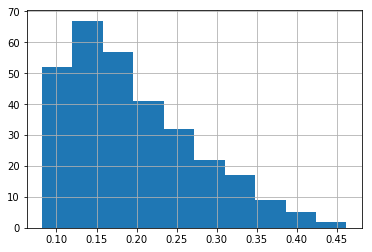

In [12]:
qnet_dissonance_df.mean(axis=1).hist()

# Compute dissonance and random mask reconstruction for random samples

___________________________________________________
304 random samples computed
___________________________________________________


,0,1,2,3
0,40.755389,0.216667,0.404723,"[ptsd2, ptsd3, ptsd4, ptsd5, ptsd6, ptsd7, pts..."
1,51.250417,0.220175,0.401841,"[ptsd4, ptsd7, ptsd13, ptsd14, ptsd16, ptsd17,..."
2,47.078067,0.217857,0.411373,"[ptsd1, ptsd2, ptsd3, ptsd4, ptsd9, ptsd10, pt..."
3,39.791391,0.216190,0.424676,"[ptsd1, ptsd9, ptsd10, ptsd12, ptsd13, ptsd15,..."
4,45.410003,0.216346,0.412540,"[ptsd1, ptsd4, ptsd8, ptsd9, ptsd10, ptsd12, p..."
...,...,...,...,...
299,40.150747,0.218095,0.416450,"[ptsd2, ptsd3, ptsd5, ptsd8, ptsd11, ptsd14, p..."
300,41.923113,0.216822,0.406717,"[ptsd1, ptsd2, ptsd4, ptsd5, ptsd6, ptsd7, pts..."
301,40.670910,0.215566,0.400573,"[ptsd1, ptsd2, ptsd4, ptsd6, ptsd7, ptsd8, pts..."
302,47.114433,0.216667,0.402613,"[ptsd3, ptsd6, ptsd7, ptsd11, ptsd13, ptsd14, ..."


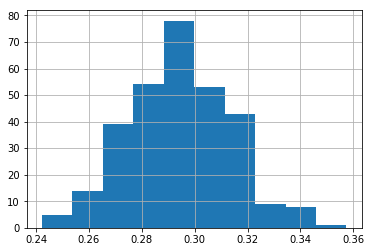

In [14]:
# computing dissonance of random samples
print("___________________________________________________")
n=304
random_samples = cognet_obj.random_sample(n=n)
print("{} random samples computed".format(n))
random_samples_strings = random_samples.values.astype(str)
results = []
for s in random_samples_strings:
    results.append(cognet_obj.dissonance(0, sample=s))
random_dissonance_df = pd.DataFrame(results)
random_dissonance_df.mean(axis=1).hist()

# computing random mask reconstruction of random samples
print("___________________________________________________")
random_samples_strings = random_samples.values.astype(str)
results = []
for s in random_samples_strings:
    results.append(cognet_obj.randomMaskReconstruction(sample=s, save_output=False))
random_randommask_df = pd.DataFrame(results)
random_randommask_df

# Comparing the dissonance distributions of Qnet vs Random Samples

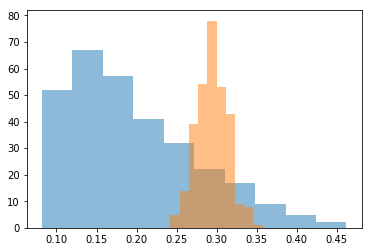

In [15]:
# comparing random and qnet sample dissonance distributions
plt.figure()
dissonance_df = pd.DataFrame(data=qnet_dissonance_df.mean(axis=1), columns=["Qnet"])
dissonance_df["random"] = random_dissonance_df.mean(axis=1)
plt.hist(dissonance_df["Qnet"], alpha=0.5, label="Qnet samples")
plt.hist(dissonance_df["random"], alpha=0.5, label="random samples")
plt.show()

# Comparing Positive vs Negative PTSD dissonance and reconstruction results

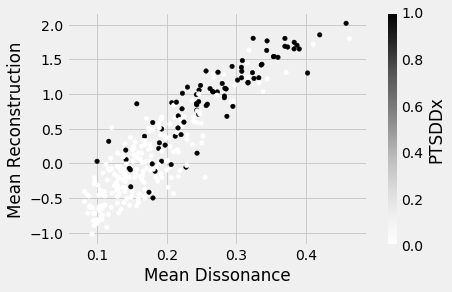

In [16]:
# getting positive and negative PTSD samples and merging with dissonance and reconstruction results
PTSD_DATA = pd.read_csv("/project2/ishanu/NLS_DATA/PTSD_cognet_test.csv")[["PTSDDx"]]

PTSD_DATA["Mean Reconstruction"] = diff_df["recon_results"] # qnet_randommask_df["rederr"]
PTSD_DATA["Mean Dissonance"] = qnet_dissonance_df.mean(axis=1)

plt.style.use('fivethirtyeight')
PTSD_DATA.plot.scatter("Mean Dissonance", "Mean Reconstruction", c="PTSDDx")

In [17]:
# find confidence interval for negative PTSD samples
neg_mean = PTSD_DATA[PTSD_DATA["PTSDDx"] == 0]["Mean Dissonance"].mean()
neg_std = PTSD_DATA[PTSD_DATA["PTSDDx"] == 0]["Mean Dissonance"].std(ddof=1)
alpha_p1 = 0.1
alpha_p05 = 0.05
n_sided = 1 # 1-sided test
z_crit = stats.norm.ppf(1-alpha_p1/n_sided)
neg_threshold_p1=((-z_crit*neg_std)+neg_mean, (+z_crit*neg_std)+neg_mean)

z_crit = stats.norm.ppf(1-alpha_p05/n_sided)
neg_threshold_p05=((-z_crit*neg_std)+neg_mean, (+z_crit*neg_std)+neg_mean)

print('PTSD Negative Threshold (90%): ',neg_threshold_p1)
print('PTSD Negative (95%): ',neg_threshold_p05)

# find confidence interval for positive PTSD samples
pos_mean = PTSD_DATA[PTSD_DATA["PTSDDx"] == 1]["Mean Dissonance"].mean()
pos_std = PTSD_DATA[PTSD_DATA["PTSDDx"] == 1]["Mean Dissonance"].std(ddof=1)
alpha_p1 = 0.1
alpha_p05 = 0.05
n_sided = 1 # 1-sided test
z_crit = stats.norm.ppf(1-alpha_p1/n_sided)
pos_threshold_p1=((-z_crit*pos_std)+neg_mean, (+z_crit*pos_std)+pos_mean)

z_crit = stats.norm.ppf(1-alpha_p05/n_sided)
pos_threshold_p05=((-z_crit*pos_std)+pos_mean, (+z_crit*pos_std)+pos_mean)

# find confidence interval for positive PTSD samples
print('PTSD Positive Threshold (90%): ',pos_threshold_p1)
print('PTSD Positive (95%): ',pos_threshold_p05)


# confidence interval for all PTSD samples
all_mean = PTSD_DATA["Mean Dissonance"].mean()
all_std = PTSD_DATA["Mean Dissonance"].std(ddof=1)
alpha_p1 = 0.1
alpha_p05 = 0.05
n_sided = 1 # 1-sided test
z_crit = stats.norm.ppf(1-alpha_p1/n_sided)
all_threshold_p1=((-z_crit*all_std)+all_mean, (+z_crit*all_std)+all_mean)

z_crit = stats.norm.ppf(1-alpha_p05/n_sided)
all_threshold_p05=((-z_crit*all_std)+all_mean, (+z_crit*all_std)+all_mean)

print('All PTSD Threshold (90%): ',all_threshold_p1)
print('All PTSD (95%): ',all_threshold_p05)


PTSD Negative Threshold (90%):  (0.0872542035757383, 0.2518911524574446)
PTSD Negative (95%):  (0.06391805990404613, 0.27522729612913677)
PTSD Positive Threshold (90%):  (0.07251669573985073, 0.36096633938087386)
PTSD Positive (95%):  (0.13934035246495663, 0.38848036174330963)
All PTSD Threshold (90%):  (0.093934785598589, 0.29858583623412405)
All PTSD (95%):  (0.0649269210054165, 0.32759370082729655)


0.38848036174330963


[(-3, 3)]

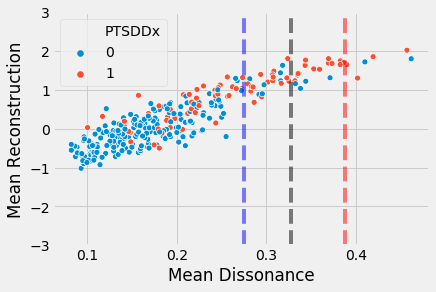

In [18]:
# plotting negative vs postive PTSD samples
import seaborn as sns
plt.gca().axes.get_xaxis().set_visible(True)
#random_mask_dissonance_df.plot.scatter("Mean Dissonance", "Mean Reconstruction", c="actual")
print(pos_threshold_p05[1])
plt.axvline(pos_threshold_p05[1], color="red", linestyle="--", alpha=.5)
#plt.axvline(pos_threshold_p1[1], color="red", linestyle="--", alpha=.5)
plt.axvline(neg_threshold_p05[1], color="blue", linestyle="--", alpha=.5)
#plt.axvline(neg_threshold_p1[1], color="blue", linestyle="--", alpha=.5)
plt.axvline(all_threshold_p05[1], color="black", linestyle="--", alpha=.5)
sns.scatterplot(PTSD_DATA["Mean Dissonance"],
                PTSD_DATA["Mean Reconstruction"],
                hue=PTSD_DATA["PTSDDx"]).set(ylim=(-3, 3))

In [19]:
print("Number of negative PTSD results that are 'suspect' at alpha level of .05:", len(PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= neg_threshold_p05[1]) & (PTSD_DATA["PTSDDx"] == 0)]["Mean Dissonance"]))
print("Number of positive PTSD results that are 'suspect' at alpha level of .05:", len(PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= pos_threshold_p05[1]) & (PTSD_DATA["PTSDDx"] == 1)]["Mean Dissonance"]))

Number of negative PTSD results that are 'suspect' at alpha level of .05: 14
Number of positive PTSD results that are 'suspect' at alpha level of .05: 4


In [113]:
PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= neg_threshold_p05[1])]#[PTSD_DATA["PTSDDx"] == 1]

,PTSDDx,Mean Reconstruction,Mean Dissonance
9,1,39.452127,0.369462
18,1,48.545839,0.316486
20,1,31.909471,0.323956
21,0,35.589638,0.291811
22,0,37.279897,0.281550
32,1,38.571410,0.301607
46,1,34.640084,0.343368
52,0,34.811713,0.316036
57,1,38.013921,0.308456
60,1,43.013907,0.419398


# Using Qsamples to generate random samples (Null Qsampling)

In [67]:
print("__________________________________________________")
null_array = np.zeros((len(features),), dtype=str)
nsamples = 304
print("{} random samples computed".format(nsamples))
qsamples = []
for n in range(nsamples):
    qsamples.append(cognet_obj.qsampling(null_array, 300))
qsamples

results = []
for s in qsamples:
    results.append(cognet_obj.dissonance(0, sample=s))
qrandom_dissonance_df = pd.DataFrame(results)

__________________________________________________
304 random samples computed


In [82]:
print("__________________________________________________")
null_array = np.zeros((len(features),), dtype=str)
nsamples = 304
print("{} random samples computed".format(nsamples))
qsamples = []
for n in range(nsamples):
    qsamples.append(cognet_obj.qsampling(null_array, 500))
qsamples

results = []
for s in qsamples:
    results.append(cognet_obj.dissonance(0, sample=s))
qrandom_dissonance_df = pd.DataFrame(results)

__________________________________________________
304 random samples computed


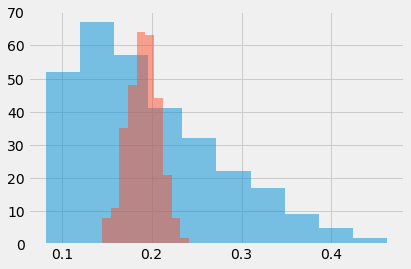

In [68]:
# comparing qsampled random and qnet sample dissonance distributions
plt.figure()
qdissonance_df = pd.DataFrame(data=qnet_dissonance_df.mean(axis=1), columns=["Qnet"])
qdissonance_df["random"] = qrandom_dissonance_df.mean(axis=1)
plt.hist(qdissonance_df["Qnet"], alpha=0.5, label="Qnet samples")
plt.hist(qdissonance_df["random"], alpha=0.5, label="random samples")
plt.show()

In [25]:
qnet_randommask_df["rederr"].mean()

35.02638788602222

In [28]:
random_randommask_df[0].mean()

38.1130648637064

In [12]:
# find confidence interval for random samples
from scipy import stats
random_mean = random_dissonance_df.mean(axis=1).mean()
random_std = random_dissonance_df.mean(axis=1).std(ddof=1)
alpha_p1 = 0.1
alpha_p05 = 0.05
n_sided = 1 # 1-sided test
z_crit = stats.norm.ppf(1-alpha_p1/n_sided)
threshold_p1=(z_crit*random_std)+random_mean

z_crit = stats.norm.ppf(1-alpha_p05/n_sided)
threshold_p05=(z_crit*random_std)+random_mean

print('Random Sample Thershold (90%): ',threshold_p1)
print('Random Sample Thershold (95%): ',threshold_p05)

# find confidence interval for qnet samples
qnet_mean = qnet_dissonance_df.mean(axis=1).mean()
qnet_std = qnet_dissonance_df.mean(axis=1).std(ddof=1)
alpha_p1 = 0.1
alpha_p05 = 0.05
n_sided = 1 # 1-sided test
z_crit = stats.norm.ppf(1-alpha_p1/n_sided)
threshold_p1=(z_crit*qnet_std)+qnet_mean

z_crit = stats.norm.ppf(1-alpha_p05/n_sided)
threshold_p05=(z_crit*qnet_std)+qnet_mean

print('Qnet Thershold (90%): ',threshold_p1)
print('Qnet Thershold (95%): ',threshold_p05)

Random Sample Thershold (90%):  0.323930021895188
Random Sample Thershold (95%):  0.33153236597733904
Qnet Thershold (90%):  0.29858583623412405
Qnet Thershold (95%):  0.32759370082729655


In [22]:
# combine the random mask reconstruction dfs
qnet_randommask_df1 = qnet_randommask_df[["rederr"]]
random_randommask_df1 = random_randommask_df[[0]]
random_randommask_df1.columns=["rederr"]
qnet_randommask_df1["actual"] = 1
random_randommask_df1["actual"] = 0
random_mask_df = pd.concat([qnet_randommask_df1, random_randommask_df1], ignore_index=True)

In [23]:
# combine the dissonance dfs
dissonance_df = pd.DataFrame(data=qnet_dissonance_df.mean(axis=1), columns=["Mean Dissonance"])
dissonance_df["actual"] = 1
dissonance_df1 = pd.DataFrame(data=random_dissonance_df.mean(axis=1), columns=["Mean Dissonance"])
dissonance_df1["actual"] = 0
dissonance_df = pd.concat([dissonance_df, dissonance_df1], ignore_index=True)

In [27]:
# combine dissonance and recon dfs
random_mask_dissonance_df = dissonance_df
random_mask_dissonance_df["Mean Reconstruction"] = random_mask_df["rederr"]
random_mask_dissonance_df

,Mean Dissonance,actual,Mean Reconstruction
0,0.185657,1,33.270891
1,0.153450,1,37.695298
2,0.222102,1,38.887323
3,0.138878,1,41.820925
4,0.146156,1,38.100904
...,...,...,...
603,0.326093,0,41.100344
604,0.288748,0,37.927735
605,0.304060,0,38.349455
606,0.276205,0,27.842122


In [ ]:
PTSD_data = pd.read_csv("/project2/ishanu/NLS_DATA/PTSD_cognet_test.csv")
PTSD_data[[1]]

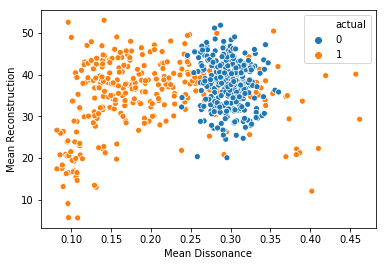

In [32]:
# plot dissonance vs recon
import seaborn as sns
plt.gca().axes.get_xaxis().set_visible(True)
#random_mask_dissonance_df.plot.scatter("Mean Dissonance", "Mean Reconstruction", c="actual")
sns.scatterplot(random_mask_dissonance_df["Mean Dissonance"],
                random_mask_dissonance_df["Mean Reconstruction"],
                hue=random_mask_dissonance_df["actual"])

In [17]:
return_df = pd.DataFrame()
for col in cognet_obj.samples.columns:
    return_df[col] = cognet_obj.samples[col].sample(n=1, replace=True).values
return_df

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,2,1,1,1,4,3,1,3,1,1,...,3,2,1,2,4,1,3,1,2,5


In [30]:
cognet_obj.samples[cognet_obj.samples.index.duplicated()]

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211


In [ ]:
# samples = pd.read_csv("PTSD_cognet_test.csv")
# samples = samples.drop(['record_id', 'PTSDDx'], axis=1)
# samples.to_csv("PTSD_cognet_test_processed.csv", index=False)
# samples = pd.read_csv("PTSD_cognet_test_processed.csv")
# samples